In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer

In [7]:
chemin = "C:/Users/ndeye anta ka cisse/Documents/horse.csv"
df = pd.read_csv(chemin)

In [9]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [10]:
df.shape

(299, 28)

In [3]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [11]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,299.000000,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.00000,299.000000,299.0,299.0
mean,532326.869565,38.168619,71.752727,29.302905,4.707547,46.288889,24.274436,2.94802,2640.136288,0.0,0.0
std,4923.281418,0.651500,27.867595,14.455231,1.982311,10.387469,27.364194,1.71416,1467.609933,0.0,0.0
min,520156.000000,36.750000,30.000000,8.000000,1.000000,23.000000,3.300000,0.10000,465.250000,0.0,0.0
25%,528904.000000,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.00000,2111.500000,0.0,0.0
50%,530301.000000,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.30000,2322.000000,0.0,0.0
75%,534736.000000,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.90000,3209.000000,0.0,0.0
max,543484.000000,39.550000,148.000000,63.000000,7.500000,73.000000,89.000000,6.75000,4855.250000,0.0,0.0


**EDA**

In [3]:
#Pourcentage des valeurs manquantes
missing_data = data.isna().mean()*100
print("Donnée manquantes: ")
print(missing_data.sort_values(ascending=False))

Donnée manquantes: 
nasogastric_reflux_ph    82.274247
abdomo_protein           66.220736
abdomo_appearance        55.183946
abdomen                  39.464883
nasogastric_reflux       35.451505
nasogastric_tube         34.782609
rectal_exam_feces        34.113712
peripheral_pulse         23.076923
rectal_temp              20.066890
respiratory_rate         19.397993
abdominal_distention     18.729097
temp_of_extremities      18.729097
pain                     18.394649
mucous_membrane          15.719064
peristalsis              14.715719
total_protein            11.036789
capillary_refill_time    10.702341
packed_cell_volume        9.698997
pulse                     8.026756
hospital_number           0.000000
age                       0.000000
surgery                   0.000000
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000


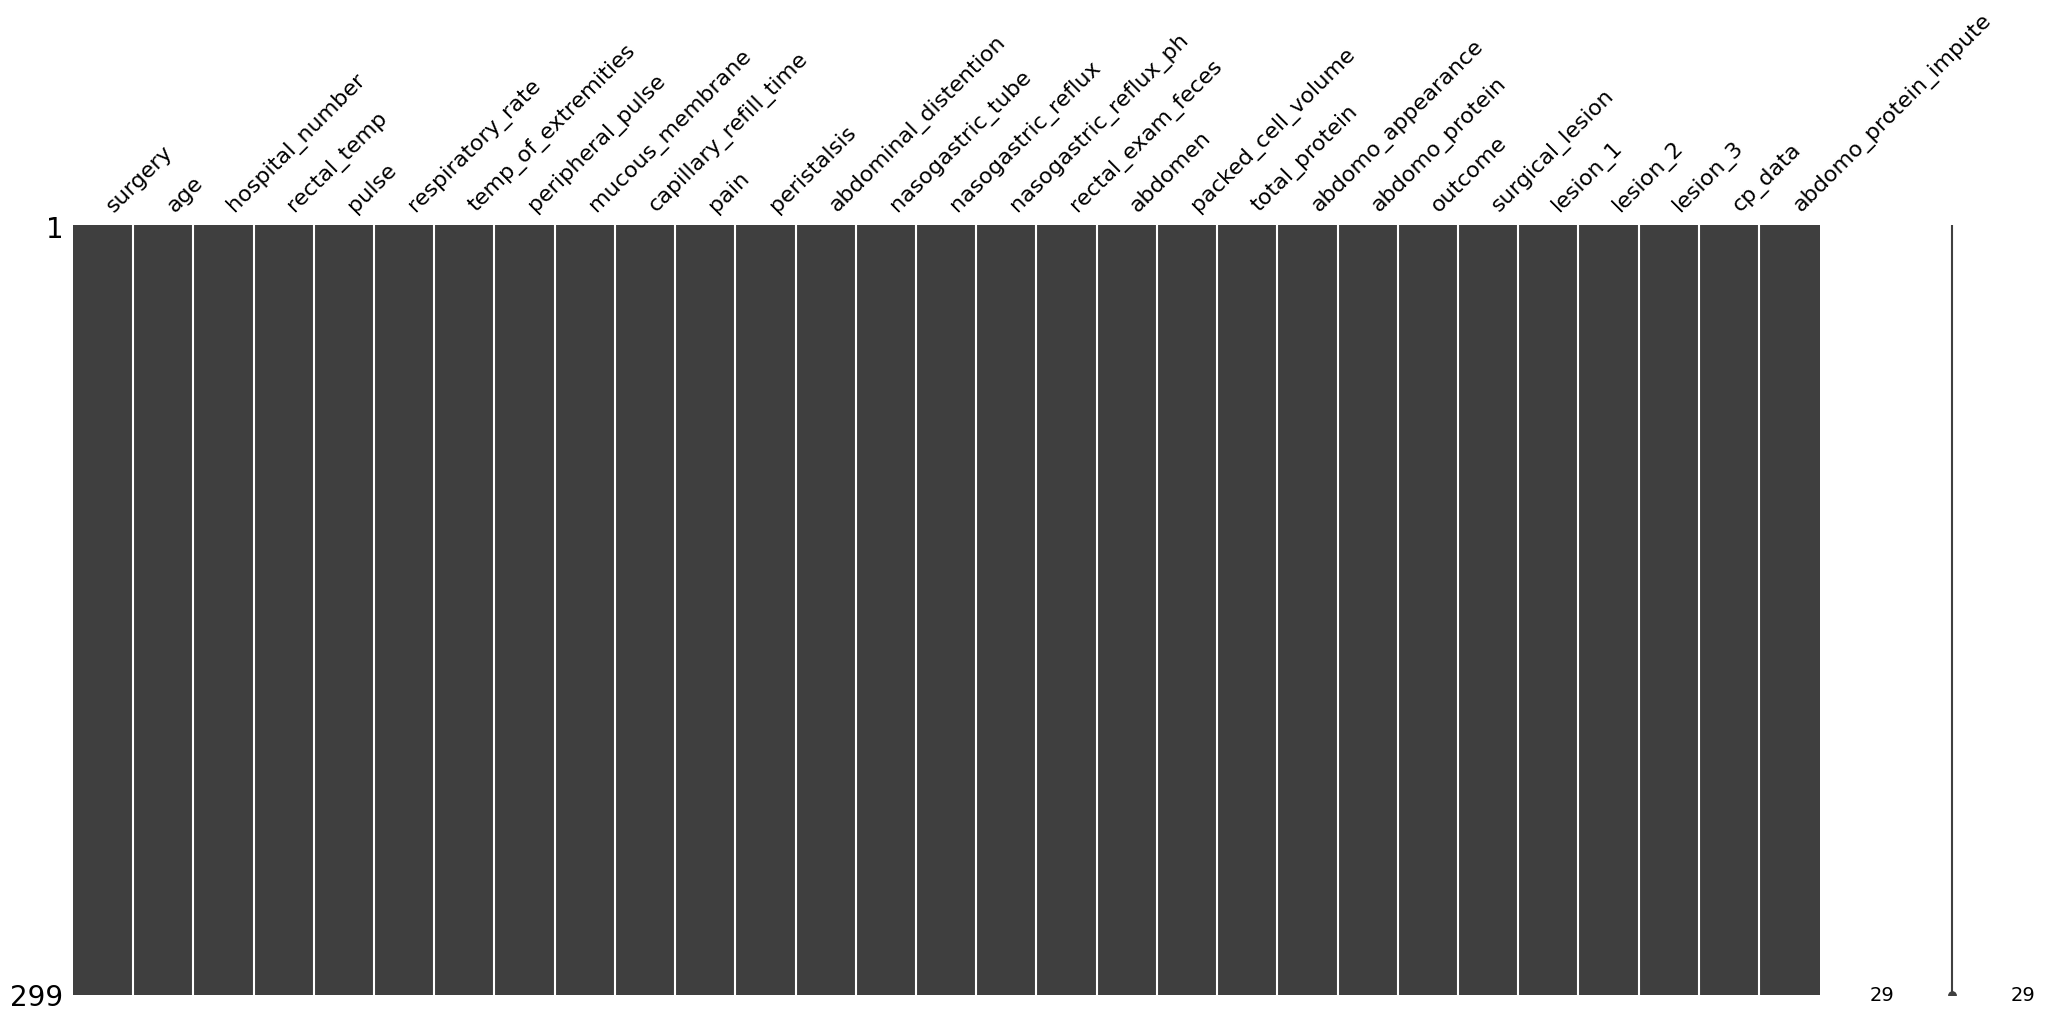

In [13]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(data)
plt.show()

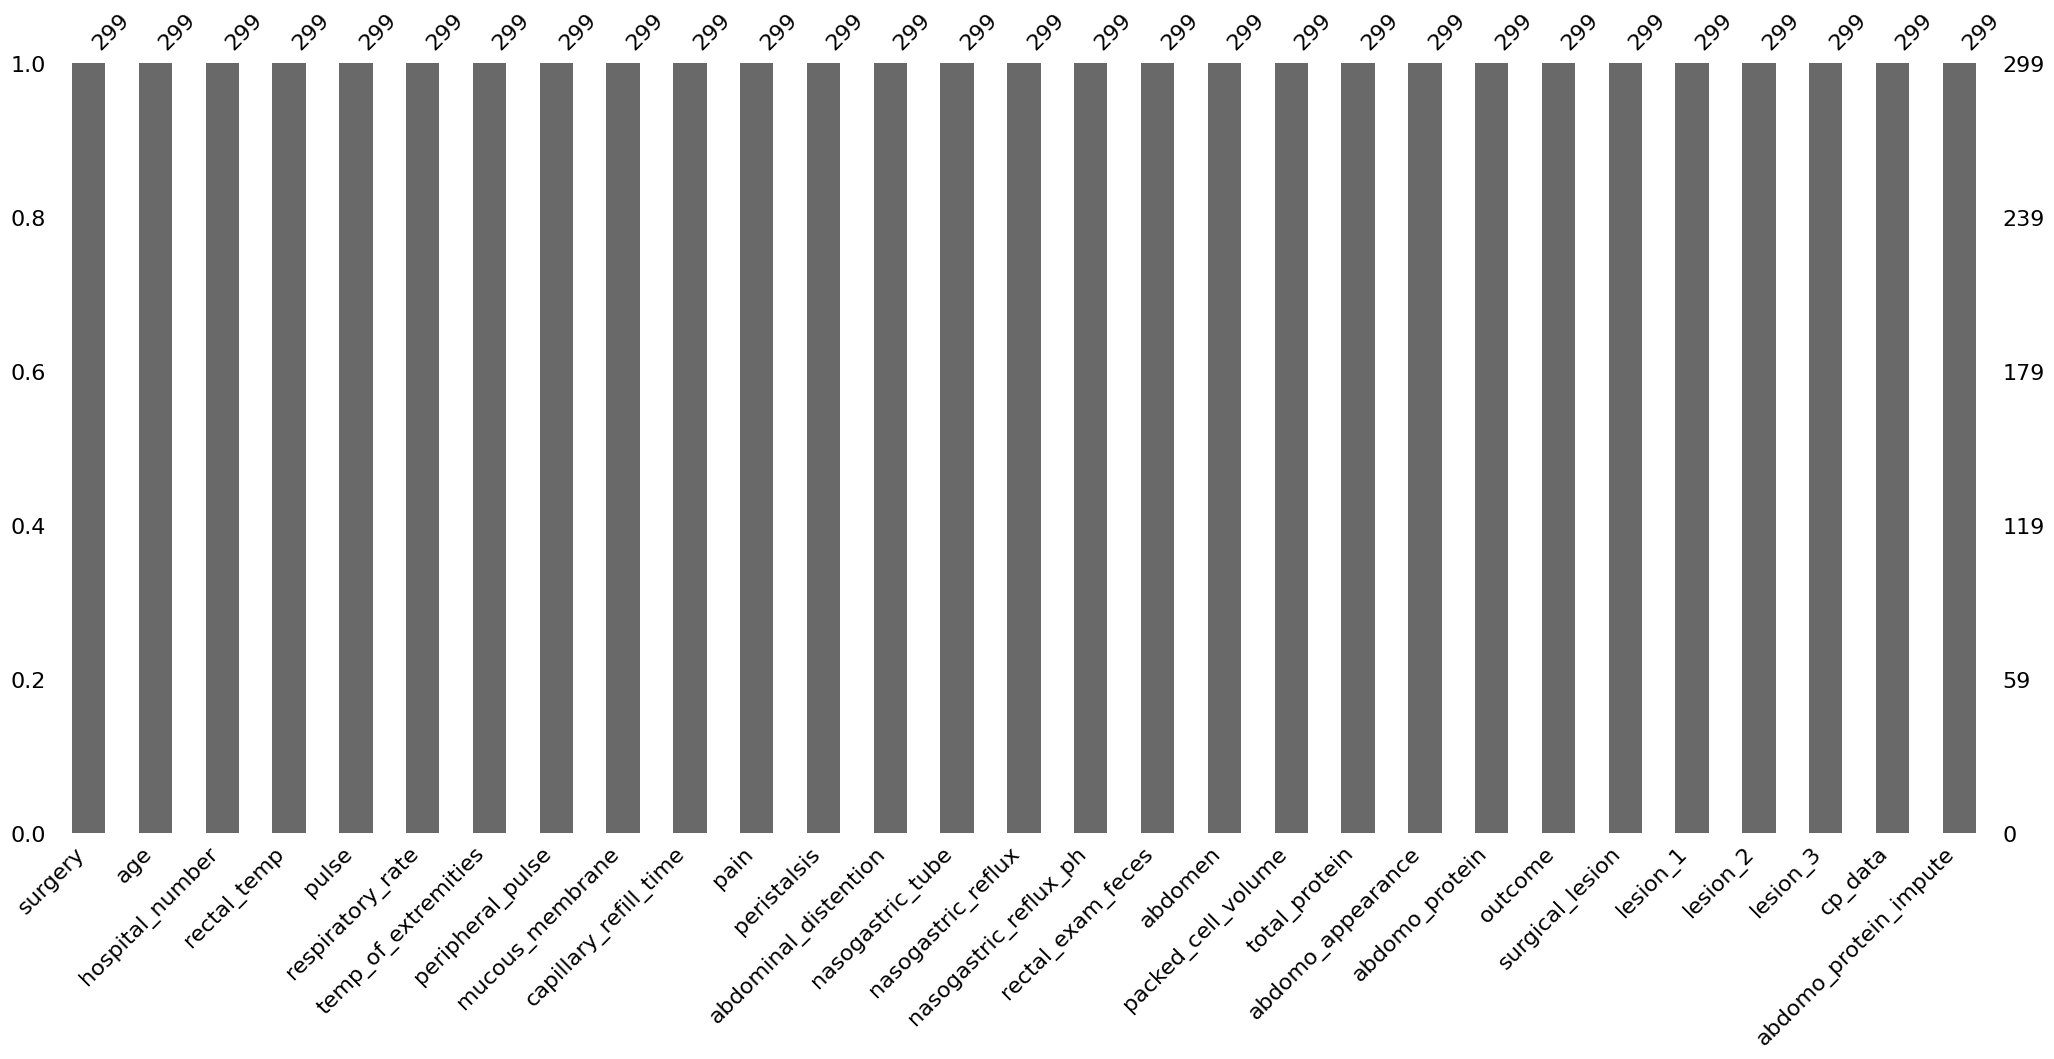

In [11]:
msno.bar(data)
plt.show()

In [5]:
#Imputation par la mediane
data = df.copy()
mediane_a_imputer = SimpleImputer(strategy='median')
# Bien former un DataFrame 2D
data['abdomo_protein_impute'] = mediane_a_imputer.fit_transform(data[['abdomo_protein']])
(data.isna().mean()*100).sort_values(ascending=False)

nasogastric_reflux_ph    82.274247
abdomo_protein           66.220736
abdomo_appearance        55.183946
abdomen                  39.464883
nasogastric_reflux       35.451505
nasogastric_tube         34.782609
rectal_exam_feces        34.113712
peripheral_pulse         23.076923
rectal_temp              20.066890
respiratory_rate         19.397993
abdominal_distention     18.729097
temp_of_extremities      18.729097
pain                     18.394649
mucous_membrane          15.719064
peristalsis              14.715719
total_protein            11.036789
capillary_refill_time    10.702341
packed_cell_volume        9.698997
pulse                     8.026756
age                       0.000000
surgery                   0.000000
hospital_number           0.000000
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
abdomo_protein_imput

Solution des Outliers

In [6]:
#selctionner uniquement les colonnes numeriques
colonnes_numeriques = data.select_dtypes(include='number').columns
#Creer un imputer avec strategy mediane
imputer = SimpleImputer(strategy='median')
##Appliquer l'imputer aux colonnes numeriques
data[colonnes_numeriques] = imputer.fit_transform(data[colonnes_numeriques])

In [7]:
#selctionner uniquement les colonnes numeriques
colonnes_categorielle = data.select_dtypes('object','number').columns
#Creer un imputer avec strategy mediane
imputer_cat = SimpleImputer(strategy='most_frequent')
##Appliquer l'imputer aux colonnes numeriques
data[colonnes_categorielle ] = imputer_cat.fit_transform(data[colonnes_categorielle ])

In [10]:
##Sauvegarde de la base 
data.to_csv('boston.csv')

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,abdomo_protein_impute
0,no,adult,530101.0,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,8.4,cloudy,2.3,died,no,11300.0,0.0,0.0,no,2.3
1,yes,adult,534817.0,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,euthanized,no,2208.0,0.0,0.0,no,2.0
2,no,adult,530334.0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,cloudy,2.3,lived,no,0.0,0.0,0.0,yes,2.3
3,yes,young,5290409.0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,died,yes,2208.0,0.0,0.0,yes,5.3
4,no,adult,530255.0,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,7.4,cloudy,2.3,died,no,4300.0,0.0,0.0,no,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886.0,38.2,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,...,65.0,cloudy,2.3,euthanized,no,3205.0,0.0,0.0,no,2.3
295,no,adult,527702.0,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,7.5,serosanguious,3.3,euthanized,yes,2208.0,0.0,0.0,yes,3.3
296,yes,adult,529386.0,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,6.8,cloudy,2.3,died,yes,3205.0,0.0,0.0,no,2.3
297,yes,adult,530612.0,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,6.0,serosanguious,3.4,lived,yes,2208.0,0.0,0.0,yes,3.4


**L'objectif est de prédir la valeur du prix des maisons en utilisant les données**